In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from weather_data import WeatherData, ModelBasedOptions, HourlyData
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
latitude = 50.732817
longitude = 16.648050

start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 1, 31)

options = ModelBasedOptions(
    hourly=[
        HourlyData.Temperature_2m,
        HourlyData.RelativeHumidity_2m,
        HourlyData.WindDirection_10m,
        HourlyData.WindSpeed_10m,
        HourlyData.Precipitation_rain_showers_snow,
    ]
)
meta_data_model, daily_model, hourly_model = WeatherData.getModelBasedData(
    latitude, longitude, start_date, end_date, options
)

meta_data_station, daily_station, hourly_station = WeatherData.getStationData(
    latitude, longitude, start_date, end_date, require_daily=False, require_hourly=True, skip_stations=["12150"]
)

In [9]:
df = pd.read_csv("/home/sarah/feinstaubprojekt-polen/data/pollution/raw/2022/2022_16_101.csv")

d = {"value": "sum"}

# JANUAR
januar = df[(df["date"] >= "2022-01-01 00:00:00") & (df["date"] <= "2022-01-31 23:00:00")]
result_januar = januar.groupby(januar.index // 24).agg(d)
result_januar = (result_januar["value"] / 24).round(5)

np_januar = result_januar.to_numpy()
result_januar = pd.DataFrame(np_januar, columns=["value"], index=pd.date_range("2022-01-01", periods=31))

#add missing values to Januar
januar.loc[194.5] = ["2022-01-09 03:00:00", 0.00]
januar.loc[194.7] = ["2022-01-09 04:00:00", 0.00]

januar = januar.sort_index().reset_index(drop=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
model = pd.DataFrame(hourly_model)

In [11]:
pm10 = januar["value"]

temp = model["temperature_2m"]
humidity = hourly_model["relativehumidity_2m"]
winddirection = hourly_model["winddirection_10m"]
windspeed = hourly_model["windspeed_10m"]
precipitation = hourly_model["precipitation"]

print(pm10.size, temp.size, humidity.size, winddirection.size, windspeed.size, precipitation.size)

744 744 744 744 744 744


In [12]:
df = pd.read_csv("/home/sarah/feinstaubprojekt-polen/src/weatherdata/correlation_input_januar.csv")
df.corr()

,temperature,humidity,winddirection,windspeed,precipitation,pm10
temperature,1.000000,0.123556,0.153396,0.304413,0.212213,-0.403773
humidity,0.123556,1.000000,-0.058972,-0.515060,0.211659,0.202298
winddirection,0.153396,-0.058972,1.000000,-0.024127,0.002879,0.039695
windspeed,0.304413,-0.515060,-0.024127,1.000000,0.161353,-0.494642
precipitation,0.212213,0.211659,0.002879,0.161353,1.000000,-0.158955
pm10,-0.403773,0.202298,0.039695,-0.494642,-0.158955,1.000000


NameError: name 'plt' is not defined

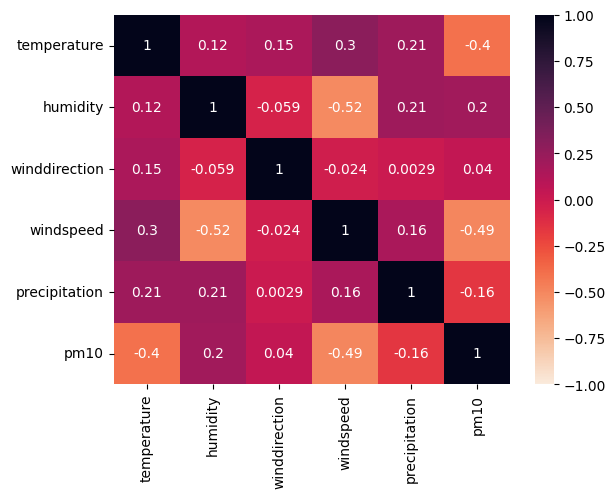

In [13]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="rocket_r")
plt.show()